In [1]:
%load_ext autoreload
%autoreload 2

In [75]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from skimage import draw
from skimage.transform import resize
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

from euclid_morphology import cutouts


def create_plots(image, seg, catalog, cutout_pixels=300, n_examples=30):
    _, ax = plt.subplots(ncols=8, nrows=n_examples, figsize=(8 * 8, 8 * n_examples))

    image = np.log10(1+image)

    for i in tqdm(range(n_examples)):
        galaxy = catalog.iloc[i]
        ra = galaxy['RIGHT_ASCENSION']
        dec = galaxy['DECLINATION']
        # seg_id = galaxy['SEG_ID']
        # params = cutouts.extract_params_by_source_index(catalog, np.random.randint(0, len(catalog)))
        ref_seg = seg[int(dec) - 64: int(dec) + 64, int(ra) - 64: int(ra) + 64]
        ref_img = image[int(dec) - 64: int(dec) + 64, int(ra) - 64: int(ra) + 64]
        # seg_cutout = cutouts.get_cutout_from_seg_map(seg, image, seg_id)
        seg_cutout = cutouts.get_cutout(image, galaxy)
        # axes = params[['SEMIMAJOR_AXIS', 'SEMIMINOR_AXIS']].values
        # rows, cols = draw.ellipse(r=ra, c=dec, r_radius=axes[0], c_radius=axes[1], shape=seg.shape)
        # ellipse = np.zeros_like(seg)
        # ellipse[cols, rows] = 1
        # maj_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)
        # rows, cols = draw.ellipse(r=ra, c=dec, r_radius=3 * axes[0], c_radius=3 * axes[1], shape=seg.shape)
        # ellipse = np.zeros_like(seg)
        # ellipse[cols, rows] = 1
        # maj3_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)

        seg_resized = resize(seg_cutout, output_shape=(cutout_pixels, cutout_pixels))
        # maj_resized = resize(maj_cutout, output_shape=(cutout_pixels, cutout_pixels))
        # maj3_resized = resize(maj3_cutout, output_shape=(cutout_pixels, cutout_pixels))

        ax[i, 0].imshow(ref_img, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 0].set_title('Reference Image Cutouts')
        ax[i, 1].imshow(ref_seg, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 1].set_title('Reference Segmentation Cutout')
        ax[i, 2].imshow(seg_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 2].set_title('Segmentation Derived Cutouts')
        # ax[i, 3].imshow(maj_cutout, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 3].set_title('Major Axis Derived Cutouts')
        # ax[i, 4].imshow(maj3_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 4].set_title('3x Major Axis Derived Cutouts')
        ax[i, 5].imshow(seg_resized, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 5].set_title('Segmentation Derived Cutouts Resized')
        # ax[i, 6].imshow(maj_resized, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 6].set_title('Major Axis Derived Cutouts Resized')
        # ax[i, 7].imshow(maj3_resized, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 7].set_title('3x Major Axis Derived Cutouts Resized')
    plt.tight_layout()
    plt.show()



In [76]:
repo_root = Path(os.path.dirname(os.getcwd()))
data_dir = repo_root / 'data/example_tile'

catalog_file = data_dir / 'EUC_MER_FINAL-CUTOUTS-CAT_TILE100158586-2F9FF9_20220829T221845.491503Z_00.00.fits'
mosaic_file = data_dir / 'EUC_MER_BGSUB-MOSAIC-VIS_TILE100158586-863FA9_20220829T190315.054985Z_00.00.fits'
segmentation_file = data_dir / 'EUC_MER_FINAL-SEGMAP_TILE100158586-CB5786_20220829T221845.491530Z_00.00.fits'


In [10]:
image, seg, catalog = cutouts.load_data_for_mosaic(catalog_file, segmentation_file, mosaic_file)

In [15]:
len(catalog)

21529

In [8]:
source_index = 400

In [12]:
cutout = cutouts.prepare_image(image, seg, catalog, source_index, mode='seg', m=1.5)

In [14]:
cutout_maj = cutouts.prepare_image(image, seg, catalog, source_index, mode='maj', m=1.5)

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(cutout[0, :, :, 0], origin='lower', cmap='viridis')
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(cutout_maj[0, :, :, 0], origin='lower', cmap='viridis')
plt.show()


In [20]:
catalog

,OBJECT_ID,RIGHT_ASCENSION,DECLINATION,CORNER_0_RA,CORNER_0_DEC,CORNER_1_RA,CORNER_1_DEC,CORNER_2_RA,CORNER_2_DEC,CORNER_3_RA,...,y,x0,y0,x1,y1,x2,y2,x3,y3,SEG_ID
0,2700402647647493929,270.040265,64.749393,270.040636,64.749249,270.039913,64.749249,270.039913,64.749552,270.040636,...,616.238573,18321.0,611.0,18332.098056,611.099566,18332.0,622.0,18320.902068,621.900435,100158586000084
1,2700389245647500747,270.038925,64.750075,270.039253,64.749966,270.038531,64.749966,270.038531,64.750241,270.039253,...,640.969566,18342.0,637.0,18353.089276,637.099730,18353.0,647.0,18341.910838,646.900271,100158586000086
2,2700398979647521630,270.039898,64.752163,270.040187,64.752025,270.039530,64.752025,270.039530,64.752272,270.040187,...,716.011175,18327.0,711.0,18337.080200,711.090503,18337.0,720.0,18326.919892,719.909498,100158586000095
3,2700402039647523980,270.040204,64.752398,270.040968,64.752028,270.039326,64.752028,270.039326,64.752716,270.040968,...,724.429730,18315.0,711.0,18340.223085,711.226344,18340.0,736.0,18314.777559,735.773660,100158586000096
4,2700523924647527160,270.052392,64.752716,270.052548,64.752627,270.052219,64.752627,270.052219,64.752793,270.052548,...,734.216032,18137.0,731.0,18142.052415,731.044363,18142.0,737.0,18136.947616,736.955637,100158586000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21524,2706327307652496414,270.632731,65.249641,270.633601,65.249274,270.631744,65.249274,270.631744,65.250024,270.633601,...,18586.219093,9222.0,18573.0,9249.990107,18572.989315,9250.0,18600.0,9222.010687,18600.010685,100158586119142
21525,2705916926652498899,270.591693,65.249890,270.592333,65.249664,270.591072,65.249664,270.591072,65.250109,270.592333,...,18595.128325,9844.0,18587.0,9863.004432,18587.005086,9863.0,18603.0,9843.995887,18602.994914,100158586119163
21526,2703815860652499865,270.381586,65.249987,270.383006,65.249552,270.380411,65.249552,270.380411,65.250465,270.383006,...,18604.727541,12999.0,18589.0,13038.118601,18589.140674,13038.0,18622.0,12998.882749,18621.859330,100158586119180
21527,2705034609652510105,270.503461,65.251011,270.504684,65.250574,270.502291,65.250574,270.502291,65.251461,270.504684,...,18636.757656,11165.0,18621.0,11201.053704,18621.060061,11201.0,18653.0,11164.947505,18652.939941,100158586119269


In [22]:
catalog.columns.values

array(['OBJECT_ID', 'RIGHT_ASCENSION', 'DECLINATION', 'CORNER_0_RA',
       'CORNER_0_DEC', 'CORNER_1_RA', 'CORNER_1_DEC', 'CORNER_2_RA',
       'CORNER_2_DEC', 'CORNER_3_RA', 'CORNER_3_DEC', 'SEMIMAJOR_AXIS',
       'SEMIMINOR_AXIS', 'POSITION_ANGLE', 'PARENT_ID', 'PARENT_VISNIR',
       'FLUX_DETECTION_TOTAL', 'x', 'y', 'x0', 'y0', 'x1', 'y1', 'x2',
       'y2', 'x3', 'y3', 'SEG_ID'], dtype=object)

In [23]:
catalog[['x0', 'x1', 'x2', 'x3', 'y0', 'y1', 'y2', 'y3']]

,x0,x1,x2,x3,y0,y1,y2,y3
0,18321.0,18332.098056,18332.0,18320.902068,611.0,611.099566,622.0,621.900435
1,18342.0,18353.089276,18353.0,18341.910838,637.0,637.099730,647.0,646.900271
2,18327.0,18337.080200,18337.0,18326.919892,711.0,711.090503,720.0,719.909498
3,18315.0,18340.223085,18340.0,18314.777559,711.0,711.226344,736.0,735.773660
4,18137.0,18142.052415,18142.0,18136.947616,731.0,731.044363,737.0,736.955637
...,...,...,...,...,...,...,...,...
21524,9222.0,9249.990107,9250.0,9222.010687,18573.0,18572.989315,18600.0,18600.010685
21525,9844.0,9863.004432,9863.0,9843.995887,18587.0,18587.005086,18603.0,18602.994914
21526,12999.0,13038.118601,13038.0,12998.882749,18589.0,18589.140674,18622.0,18621.859330
21527,11165.0,11201.053704,11201.0,11164.947505,18621.0,18621.060061,18653.0,18652.939941


Text(0.5, 1.0, 'Corner index is defined anticlockwise from bottom-right')

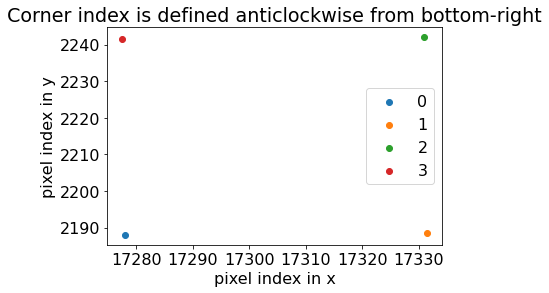

In [58]:
source = catalog.iloc[400]
for i in range(4):
    plt.scatter(source[f'x{i}'], source[f'y{i}'], label=i)
plt.legend()
plt.xlabel('pixel index in x')
plt.ylabel('pixel index in y')
plt.title('Corner index is defined anticlockwise from bottom-right')


In [59]:
seg.max()

100158586119322

In [60]:
# test the pixel corners are indeed the max and min indices
y_indices, x_indices = np.where(seg == source['SEG_ID'])
y_indices.max(), source['y3']

(2218, 2241.5759734462918)

In [61]:
y_indices.min(), source['y0']

(2211, 2187.999999999909)

In [62]:
x_indices.max(), source['x1']

(17308, 17331.427419980173)

In [63]:
x_indices.min(), source['x0']
# yes, pixel indices in segmentation map found manually with np.where match coord-to-pixel indices of corners listed in catalog
# so no need to use np.where, can just use corners directly

(17302, 17277.99999999986)

In [29]:
catalog['segmap_pixel_width'] = catalog['x1'] - catalog['x0']
catalog['segmap_pixel_height'] = catalog['y3'] - catalog['y0']

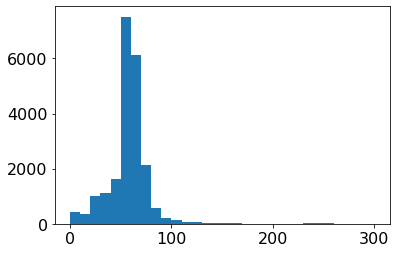

In [36]:
_ = plt.hist(catalog['segmap_pixel_width'], range=(0, 300), bins=30)
# _ = plt.hist(catalog['segmap_pixel_height'], range=(0, 300), bins=30)  # the same, thankfully

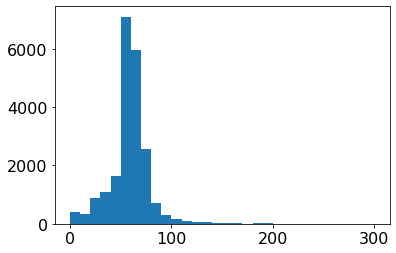

In [38]:
catalog['min_pixel_extent'] = catalog[['segmap_pixel_width', 'segmap_pixel_height']].min(axis=1)
catalog['max_pixel_extent'] = catalog[['segmap_pixel_width', 'segmap_pixel_height']].max(axis=1)
_ = plt.hist(catalog['max_pixel_extent'], range=(0, 300), bins=30)  # this will set size of cutout (other axis will be set this big, e.g. edge-on disk)

In [46]:
detailed_catalog = catalog.query('max_pixel_extent >= 75')
# mosaic is in native pixels so this will correspond to some angular size (pixels * native pixel resolution in arcsec)
len(detailed_catalog)

2392

In [77]:

# 30 examples * 6ish cutout versions = ~180 seconds 
create_plots(image, seg, detailed_catalog, n_examples=10)

100%|██████████| 10/10 [00:00<00:00, 302.19it/s]
